# Project 1 Loan Prediction Dataset
# Graph Analysis Notebook
## Ryan Rosiak and Grant Dawson
## 9/19/21

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset Import
lp_dataframe = pd.read_csv('./Dataset/Training_Data.csv', header=0)
lp_dataframe.head(15)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
5,6,6915937,64,0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,0,12,0
6,7,3954973,58,14,married,rented,no,Librarian,Tiruppur,Tamil_Nadu,8,12,0
7,8,1706172,33,2,single,rented,no,Economist,Jamnagar,Gujarat,2,14,0
8,9,7566849,24,17,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,11,11,0
9,10,8964846,23,12,single,rented,no,Architect,Karimnagar,Telangana,5,13,0


In [3]:
# Clean some of the data
# i.e. remove the id column from the original import
# and convert the income number to a float
del lp_dataframe['Id']
lp_dataframe['Income'] = lp_dataframe['Income'] * (1/100)
lp_dataframe.head(15)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,13038.34,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,75745.16,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,39918.15,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,62564.51,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,57688.71,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
5,69159.37,64,0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,0,12,0
6,39549.73,58,14,married,rented,no,Librarian,Tiruppur,Tamil_Nadu,8,12,0
7,17061.72,33,2,single,rented,no,Economist,Jamnagar,Gujarat,2,14,0
8,75668.49,24,17,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,11,11,0
9,89648.46,23,12,single,rented,no,Architect,Karimnagar,Telangana,5,13,0


In [4]:
# Now to print out some of the attributes
# Dimensions of dataset
lp_dataframe.shape

(252000, 12)

### Current Questions Proposed in Paper for Reference:
#### 1. Does more experience mean more income?
#### 2. Does location mean more income?
#### 3. Can you make a model to guess risk factor? Can prediction models help?
#### 4. Are there certain jobs that reside in certain places?
#### 5. Do certain places have more renting than others?
#### 6. Do certain places have higher loan acceptance?
#### 7. Do certain places have less people without cars?
#### 8. Does where you live affect the loan process?
#### 9. What is the difference in being considered risk/non-risk as it relates to being married/single?
#### 10. Do older individuals have more professional experience?
#### 11. What professions make the most money?
#### 12. Do people younger than 22 generally have relatively less job experience than people older (out of college)?

<br></br>
### Graph for Question 10:

### Q: 10. Do older individuals have more professional experience?

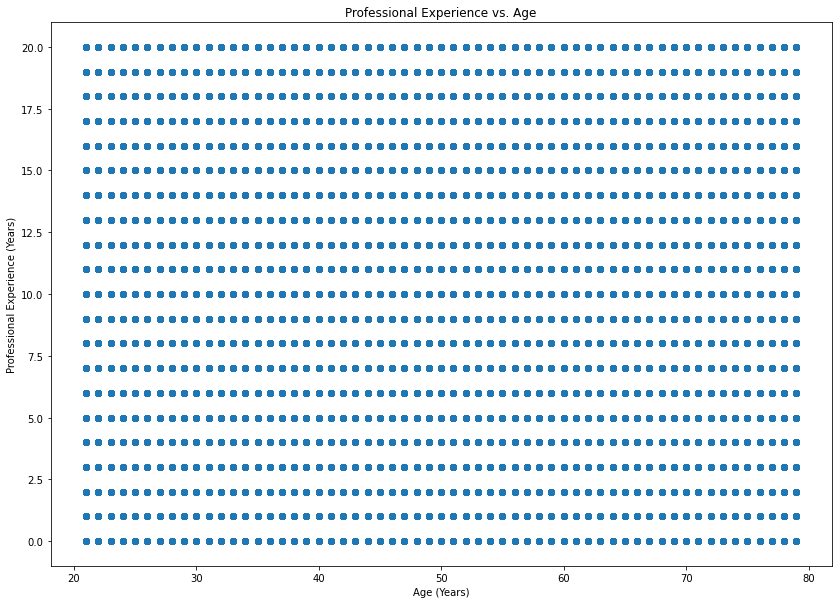

In [49]:
# Creating a scatter plot for this scenario
y_axis = lp_dataframe[['Experience']]
x_axis = lp_dataframe[['Age']]
plt.figure(figsize=(14,10))
plt.scatter(x_axis, y_axis)
plt.title('Professional Experience vs. Age')
plt.ylabel('Professional Experience (Years)')
plt.xlabel('Age (Years)')
plt.show()

<br></br>
### Graph for Question 9:

### Q: What is the difference in being considered risk/non-risk as it relates to being married/single?

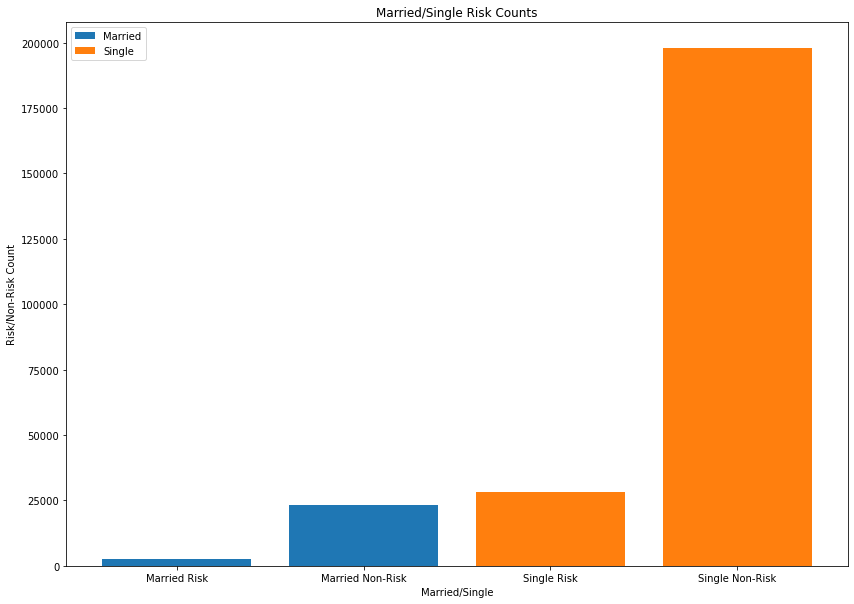

In [40]:
list_data = lp_dataframe[['Married/Single', 'Risk_Flag']]
result1 = list_data.loc[(list_data['Married/Single'] == 'married') & (list_data['Risk_Flag'] == 1)].count()
result2 = list_data.loc[(list_data['Married/Single'] == 'married') & (list_data['Risk_Flag'] == 0)].count()
result3 = list_data.loc[(list_data['Married/Single'] == 'single') & (list_data['Risk_Flag'] == 1)].count()
result4 = list_data.loc[(list_data['Married/Single'] == 'single') & (list_data['Risk_Flag'] == 0)].count()
plt.figure(figsize=(14,10))
plt.bar(['Married Risk', 'Married Non-Risk'],
        [result1[0], result2[0]])
plt.bar(['Single Risk', 'Single Non-Risk'],
       [result3[0], result4[0]])
plt.title('Married/Single Risk Counts')
plt.ylabel('Risk/Non-Risk Count')
plt.xlabel('Married/Single')
plt.legend(['Married', 'Single'])
plt.show()

<br></br>
### Graph for Question 11:

### Q: What professions make the most money?

In [63]:
sub_data_lp = lp_dataframe[['Income', 'Profession']]
max_income_professions = sub_data_lp.groupby(by='Profession').max().sort_values(by='Income', ascending=False)
print('Top 10 Highest Paid Professions (Max)')
print(max_income_professions[:10])
mean_income_professions = sub_data_lp.groupby(by='Profession').mean().sort_values(by='Income', ascending=False)
print('\nTop 10 Highest Paid Professions (Avg)')
print(mean_income_professions[:10])

Top 10 Highest Paid Professions (Max)
                              Income
Profession                          
Police_officer              99999.38
Librarian                   99994.00
Drafter                     99991.80
Aviator                     99982.80
Secretary                   99980.70
Designer                    99969.46
Statistician                99968.61
Computer_hardware_engineer  99961.92
Surgeon                     99954.45
Biomedical_Engineer         99949.32

Top 10 Highest Paid Professions (Avg)
                           Income
Profession                       
Petroleum_Engineer   54433.098274
Psychologist         53577.952618
Designer             53368.022299
Scientist            52827.104229
Surgeon              52353.587127
Comedian             51995.385292
Chemical_engineer    51898.049948
Mechanical_engineer  51750.320684
Artist               51647.651819
Financial_Analyst    51457.525150


<br></br>
### Graph for Question 12:

### Q: Do people younger than 22 generally have relatively less job experience than people older (out of college)?

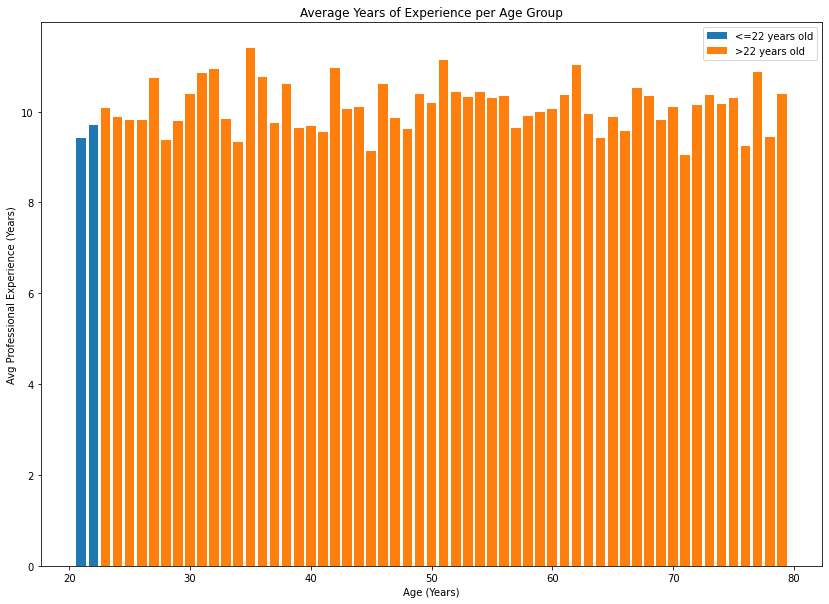

In [77]:
sub_data_lp = lp_dataframe[['Age', 'Experience']]
result_cond_young = sub_data_lp.loc[sub_data_lp['Age'] <= 22].groupby(by='Age').mean()
result_cond_old = sub_data_lp.loc[sub_data_lp['Age'] > 22].groupby(by='Age').mean()
x_axis1 = result_cond_young.reset_index()['Age']
y_axis1 = result_cond_young.reset_index()['Experience']
x_axis2 = result_cond_old.reset_index()['Age']
y_axis2 = result_cond_old.reset_index()['Experience']
plt.figure(figsize=(14,10))
plt.bar(x_axis1, y_axis1)
plt.bar(x_axis2, y_axis2)
plt.title('Average Years of Experience per Age Group')
plt.xlabel('Age (Years)')
plt.ylabel('Avg Professional Experience (Years)')
plt.legend(['<=22 years old', '>22 years old'])
plt.show()